<a href="https://colab.research.google.com/github/nabhylanr/ISPU-Classification/blob/main/ISPU_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Data diunduh dari website Dinas Lingkungan Hidup Jakarta pada Kamis, 20 November 2025

In [4]:
url = "https://raw.githubusercontent.com/nabhylanr/ISPU-Classification/main/data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-(1763631760675).xlsx"
df = pd.read_excel(url)

## Exploratory Data Analysis

### Informasi Dataset

In [5]:
df.head(10)

,parameter_pencemar_kritis,kategori,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max
0,NaN,SEDANG,202401,1,21,DKI3 Jagakarsa,51.0,65.0,45.0,9.0,8.0,79.0,79.0
1,NaN,SEDANG,202401,1,22,DKI3 Jagakarsa,27.0,34.0,45.0,5.0,8.0,56.0,56.0
2,PM25,SEDANG,202401,1,23,DKI3 Jagakarsa,NaN,52.0,46.0,6.0,9.0,51.0,52.0
3,PM25,SEDANG,202401,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0
4,PM25,SEDANG,202401,1,25,DKI3 Jagakarsa,37.0,55.0,47.0,7.0,11.0,28.0,55.0
5,PM25,SEDANG,202401,1,26,DKI3 Jagakarsa,43.0,62.0,50.0,7.0,15.0,14.0,62.0
6,PM25,SEDANG,202401,1,27,DKI3 Jagakarsa,40.0,52.0,48.0,8.0,12.0,10.0,52.0
7,PM25,SEDANG,202401,1,28,DKI3 Jagakarsa,40.0,62.0,48.0,12.0,12.0,18.0,62.0
8,SO2,BAIK,202401,1,29,DKI3 Jagakarsa,33.0,44.0,47.0,14.0,12.0,24.0,47.0
9,PM10,SEDANG,202401,1,30,DKI3 Jagakarsa,58.0,46.0,48.0,22.0,12.0,33.0,58.0


Fitur:
1. periode_data : Penjelasan Periode Data 1 Bulan Sekali
2. bulan : adalah bulan penggambilan data Indeks Standar Pencemar Udara (ISPU)
3. tanggal : adalah tanggal pengambilan data Indeks Standar Pencemar Udara (ISPU)
4. stasiun : adalah lokasi penempatan alat pemantauan udara
5. pm_sepuluh : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter PM10 (nama salah satu nama parameter yang dipantau) yaitu Partikulat dengan ukuran di bawah 10 mikron
6. pm_duakomalima : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter PM2.5 (nama salah satu nama parameter yang dipantau), yaitu Partikulat dengan ukuran di bawah 2.5 mikron
7. sulfur_dioksida : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter sulfur dioksida/ SO2 (nama salah satu nama parameter yang dipantau)
8. karbon_monoksida : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter karbon monoksida/ CO (nama salah satu nama parameter yang dipantau)
9. ozon : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter ozon/ O3 (nama salah satu nama parameter yang dipantau)
10. nitrogen_dioksida : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter nitrogen dioksida/ NO2 (nama salah satu nama parameter yang dipantau)
11. max : adalah nilai tertinggi hasil pengukuran Indeks Standar Pencemar Udara (ISPU) dari beberapa parameter yang dipantau pada Stasiun Pemantau Kualitas Udara (SPKU) dan tanggal pengukuran tertentu
12. parameter_pencemar_kritis : adalah nama parameter yang dipantau yang hasil nilai Indeks Standar Pencemar Udara (ISPU) nya paling tinggi pada Stasiun Pemantau Kualitas Udara (SPKU) dan tanggal tertentu
13. kategori : adalah kategori hasil pengukuran Indeks Standar Pencemar Udara (ISPU) pada Stasiun Pemantau Kualitas Udara (SPKU) dan tanggal tertentu

In [6]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 3196
Jumlah kolom: 13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   parameter_pencemar_kritis  3133 non-null   object 
 1   kategori                   3195 non-null   object 
 2   periode_data               3196 non-null   int64  
 3   bulan                      3196 non-null   int64  
 4   tanggal                    3196 non-null   int64  
 5   stasiun                    3196 non-null   object 
 6   pm_sepuluh                 2979 non-null   float64
 7   pm_duakomalima             3138 non-null   float64
 8   sulfur_dioksida            3142 non-null   float64
 9   karbon_monoksida           3149 non-null   float64
 10  ozon                       3152 non-null   float64
 11  nitrogen_dioksida          3129 non-null   float64
 12  max                        3188 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage:

In [8]:
df.describe()

,periode_data,bulan,tanggal,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max
count,3196.000000,3196.000000,3196.000000,2979.000000,3138.000000,3142.000000,3149.000000,3152.000000,3129.000000,3188.000000
mean,202448.616708,5.875782,15.729349,49.638134,72.058955,35.890197,15.321372,24.112627,27.019495,73.820263
std,48.838642,3.195737,8.800713,16.480404,23.379327,16.254768,6.900886,13.139669,16.940223,21.472891
min,202401.000000,1.000000,1.000000,5.000000,10.000000,3.000000,2.000000,2.000000,1.000000,0.000000
25%,202406.000000,3.000000,8.000000,38.000000,57.000000,23.000000,10.000000,15.000000,14.000000,59.000000
50%,202411.000000,6.000000,16.000000,52.000000,74.000000,32.000000,14.000000,22.000000,23.000000,74.000000
75%,202504.000000,8.000000,23.000000,61.000000,88.000000,53.000000,20.000000,30.000000,37.000000,88.000000
max,202509.000000,12.000000,31.000000,187.000000,157.000000,112.000000,70.000000,115.000000,202.000000,202.000000


### Distribution Target Variable (Kategori)

In [10]:
print("Distribusi target variabel")
print(df['kategori'].value_counts())

print("\nPersentase:")
print(df['kategori'].value_counts(normalize=True) * 100)

Distribusi target variabel
kategori
SEDANG                2461
BAIK                   383
TIDAK SEHAT            332
TIDAK ADA DATA          18
SANGAT TIDAK SEHAT       1
Name: count, dtype: int64

Persentase:
kategori
SEDANG                77.026604
BAIK                  11.987480
TIDAK SEHAT           10.391236
TIDAK ADA DATA         0.563380
SANGAT TIDAK SEHAT     0.031299
Name: proportion, dtype: float64


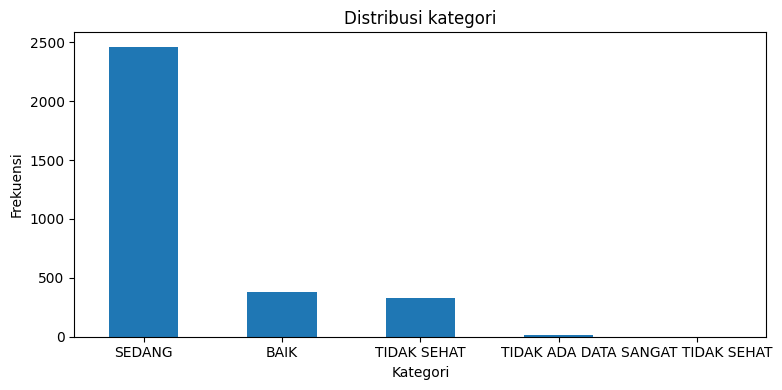

In [13]:
plt.figure(figsize=(8, 4))
df['kategori'].value_counts().plot(kind='bar')
plt.title('Distribusi kategori')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Distribution Chart

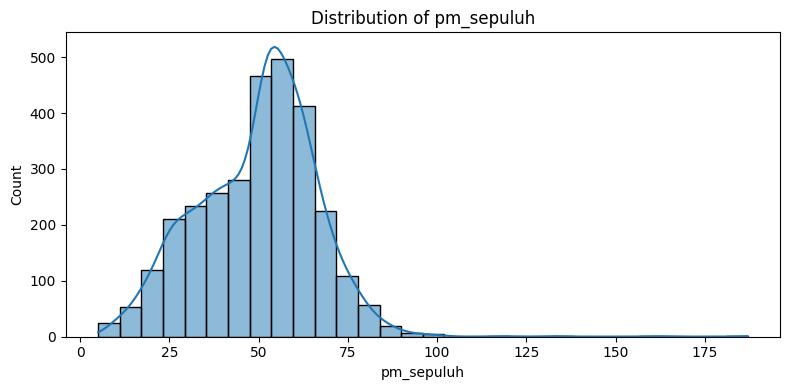

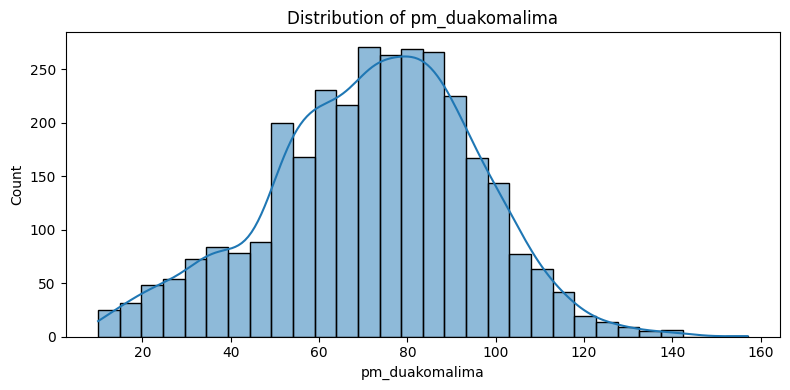

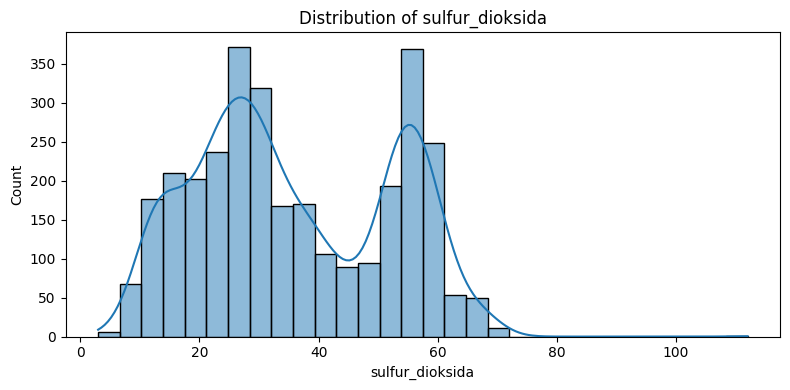

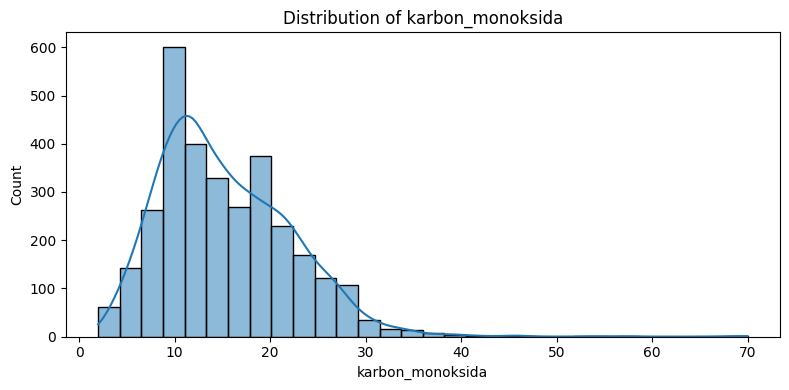

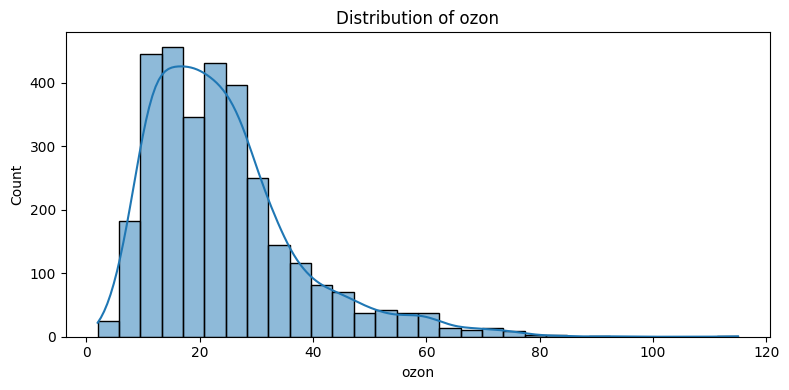

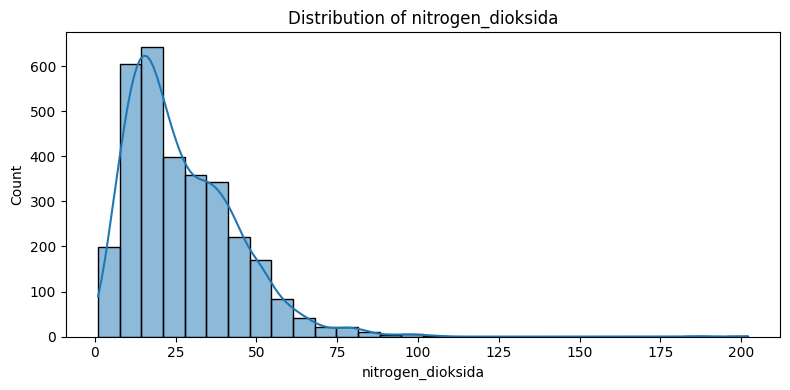

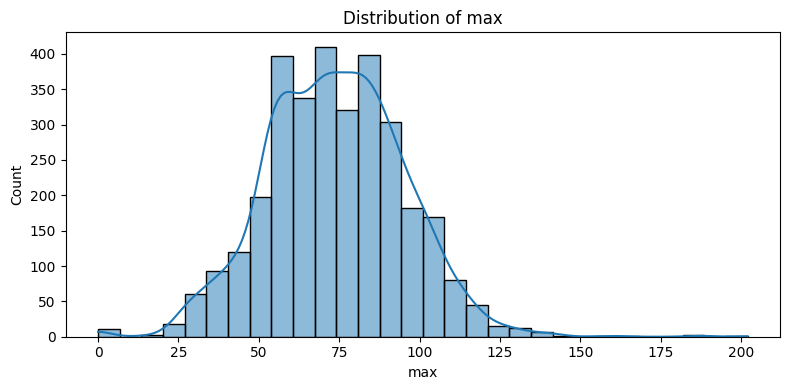

In [15]:
num_cols = df.select_dtypes(include=['float64']).columns

for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

### Stasiun Type Plot

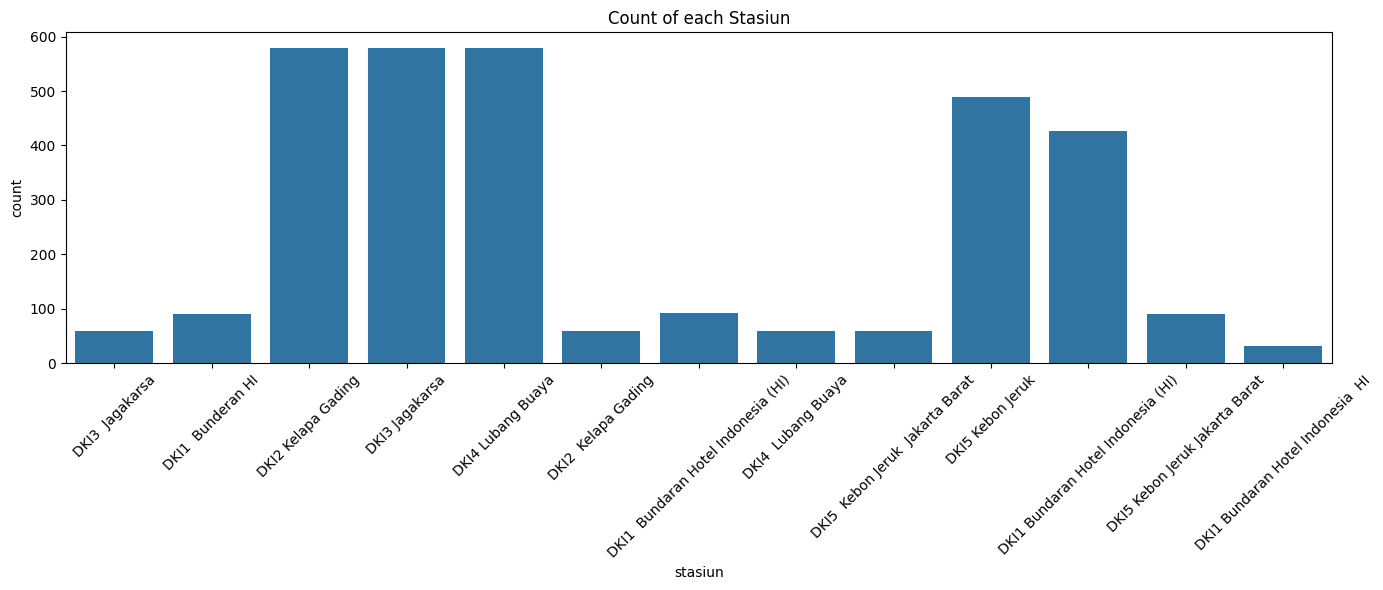

In [17]:
if 'stasiun' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.countplot(x='stasiun', data=df)
    plt.title('Count of each Stasiun')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Corr Heatmap

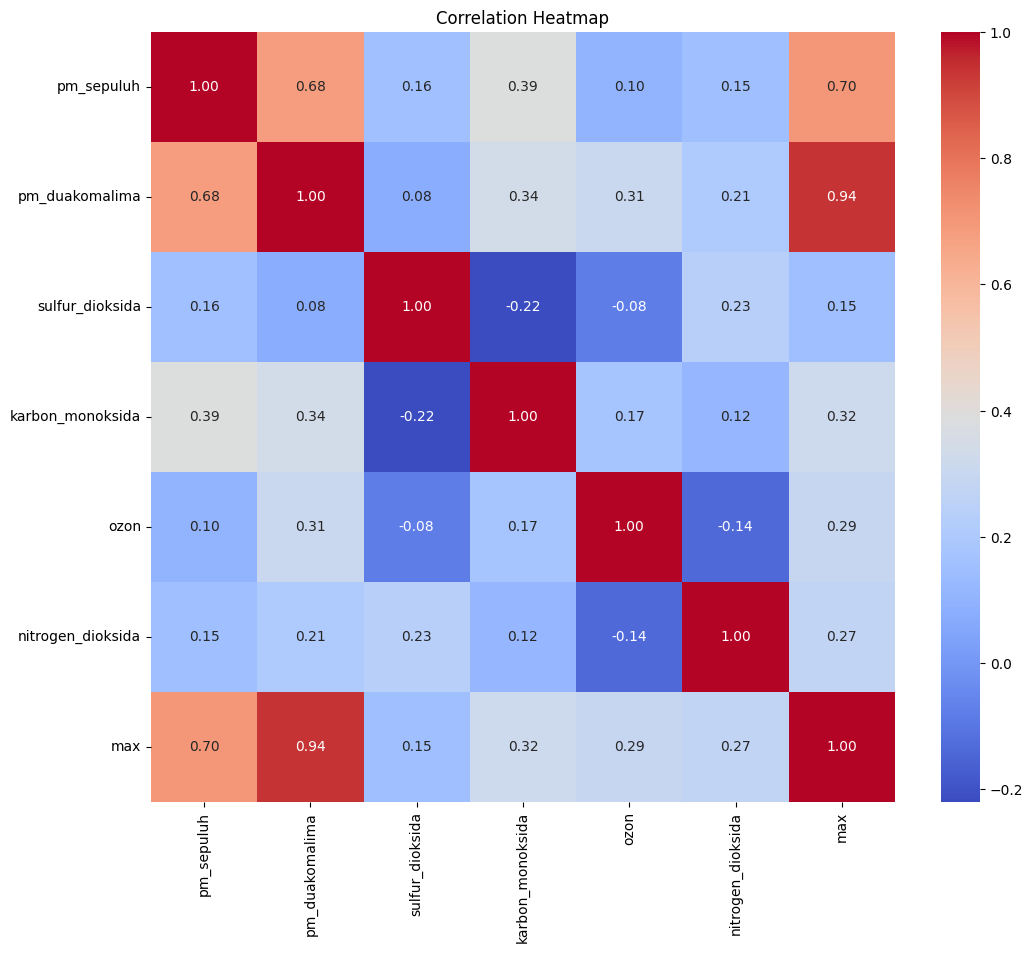

In [21]:
num_cols = df.select_dtypes(include=['float64']).columns

if len(num_cols) >= 4:
    plt.figure(figsize=(12, 10))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()